In [1]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import spearmanr



In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
# Data Preperation Module 2
# There are two files in module 2
# Module 2

module2mg = pd.read_csv('Module2-MoodleGrades.csv')

In [7]:
module2ml = pd.read_csv('Module2-MoodleLog.csv')

In [8]:
# Time2
time2 = module2ml["Time"].str.split(",", n = 1, expand = True)


In [9]:
# making separate Date column from new data frame 
module2ml["Date"]= time2[0] 

# making seperate Time column from new data frame
module2ml['Time']= time2[1]


In [10]:
# Convert the date column to datetime64
module2ml.Date = pd.to_datetime(module2ml.Date)


In [11]:
#Remove activity outside semester start and end dates range -Timeedit2
mask2 = (module2ml['Date'] >= StartDate) & (module2ml['Date'] <= EndDate)

module2ml = module2ml.loc[mask2]

len(module2ml)

15794

In [12]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_2 = (module2ml['Date'] >= StartDate) & (module2ml['Date'] <= TriOne)

FirstFive2 = module2ml.loc[week5_2]

len(FirstFive2)


7508

In [13]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_2 = (module2ml['Date'] >= TriOne) & (module2ml['Date'] <= TriTwo)

FirstTen2 = module2ml.loc[week10_2]

len(FirstTen2)


4084

In [14]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_2 = (module2ml['Date'] >= TriTwo) & (module2ml['Date'] <= EndDate)

FirstFivt2 = module2ml.loc[week15_2]

len(FirstFivt2)


4826

In [15]:
print (module2mg.columns.tolist())
# Note Quiz: CA3 - QUIZ  (Real) has a couple of spaces in it

['First name', 'Surname', 'ID number', 'Email address', 'Quiz: CA3 - QUIZ  (Real)', 'Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)', 'Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)', 'Course total (Real)', 'Last downloaded from this course']


In [16]:
# Print the number of unique values in each modul2mg column
print(module2mg.nunique())

First name                                                          138
Surname                                                             138
ID number                                                           138
Email address                                                       138
Quiz: CA3 - QUIZ  (Real)                                             81
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)     18
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)          34
Course total (Real)                                                 118
Last downloaded from this course                                      1
dtype: int64


In [17]:
# Print the number of unique values in each modul2ml column
print(module2ml.nunique())

Time              1142
User full name     138
Affected user        1
Event context       66
Component            9
Event name          25
Description         31
IP address           1
Origin               2
Date                88
dtype: int64


In [18]:
# Cleanup2
module2ml = module2ml.drop(module2ml[['IP address','Origin','Description','Affected user']], axis=1)

In [19]:
module2ml.dtypes

Time                      object
User full name            object
Event context             object
Component                 object
Event name                object
Date              datetime64[ns]
dtype: object

In [20]:
# new data frame with split value columns 
new2 = module2ml["User full name"].str.split(" ", n = 1, expand = True)


In [21]:
# making separate first name column from new data frame 
module2ml["First name"]= new2[0] 

# making separate last name column from new data frame 
module2ml["Last name"]= new2[1] 


In [22]:
module2ml.dtypes

Time                      object
User full name            object
Event context             object
Component                 object
Event name                object
Date              datetime64[ns]
First name                object
Last name                 object
dtype: object

In [23]:
module2ml["Event context"].value_counts()
# The Most frequent are assignment: upload assignment 1
# 

Course: Module 2                                                               5576
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION                      1754
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING                           1474
File: ASSIGNMENT 2 - REFLECTIVE WRITING                                         745
File: TEMPLATE FOR ASSIGNMENT 2                                                 727
File: ASSIGNMENT 1 - POWERPOINT PRESENTATION                                    529
File: Using Gibbs Reflective Cycle in Coursework                                426
URL: ENTER YOUR NAME HERE TO RECEIVE YOUR TOPIC NUMBER                          389
File: Assignment Declaration Form                                               387
File: ITB Harvard Referencing Guide                                             206
File: Sample Presentation Layout                                                202
File: Lab Activity 2 - Evaluating Information                               

In [24]:
m2mg = module2mg[[ 'First name', 'Surname','ID number','Quiz: CA3 - QUIZ  (Real)','Course total (Real)','Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)','Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)']]
#'Quiz: CA3 - QUIZ (Real) , Quiz: CA3 - QUIZ (Real) not in index
# Tidy up on colums without 

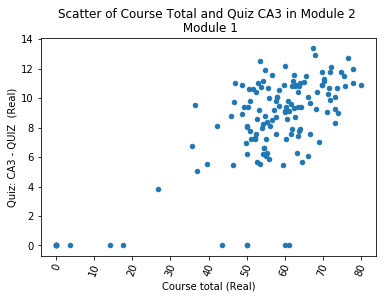

In [25]:
m2mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: CA3 - QUIZ  (Real)', rot=70)
plt.title('Scatter of Course Total and Quiz CA3 in Module 2 \n Module 1')



In [26]:
module2ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc


In [27]:
#
#Engaged = > 55
disengaged2 = module2mg['Course total (Real)'] < 55


In [29]:

# Create a new column called df.engaged where the value is yes
# if Course Total Real is greater than 55 and no if not
module2mg['disengaged'] = np.where(module2mg['Course total (Real)']<=55, '1', '0')




In [30]:
module2mg['disengaged'] = pd.to_numeric(module2mg['disengaged'])

In [31]:
module2mg.head(2)

,First name,Surname,ID number,Email address,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real),Course total (Real),Last downloaded from this course,disengaged
0,a8NM,bDqB,U8NMDqBG,U8NMDqBG@student.itb.ie,7.30,13,32,52.30,1548158947,1
1,aSnR,bGk9,VSnRGk9O,VSnRGk9O@student.itb.ie,8.55,10,38,56.55,1548158947,0


In [32]:
disengaged2.count()

138

In [33]:
module2mg.dtypes

First name                                                           object
Surname                                                              object
ID number                                                            object
Email address                                                        object
Quiz: CA3 - QUIZ  (Real)                                            float64
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)      int64
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)           int64
Course total (Real)                                                 float64
Last downloaded from this course                                      int64
disengaged                                                            int64
dtype: object

In [34]:
m2mg_subset = module2mg.drop(module2mg[['Email address','Last downloaded from this course']], axis=1)
#dropcolumnsm2mg

In [35]:
m2mg_subset.dtypes

First name                                                           object
Surname                                                              object
ID number                                                            object
Quiz: CA3 - QUIZ  (Real)                                            float64
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)      int64
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)           int64
Course total (Real)                                                 float64
disengaged                                                            int64
dtype: object

In [36]:
spear1 = m2mg_subset['Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)']

In [37]:
spear2 = m2mg_subset['Course total (Real)']

In [38]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.9245499104402608, pvalue=7.6411144460062279e-59)


In [39]:
pearcorr = stats.pearsonr(spear1, spear2)
print(pearcorr)

(0.89533766540152671, 1.2883884321483088e-49)


In [40]:
m2mg_subset.head(2)

,First name,Surname,ID number,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real),Course total (Real),disengaged
0,a8NM,bDqB,U8NMDqBG,7.30,13,32,52.30,1
1,aSnR,bGk9,VSnRGk9O,8.55,10,38,56.55,0


In [41]:
Xm2mg = m2mg_subset.iloc[:,3:6]  #independent columns
ym2mg = m2mg_subset.iloc[:,-1]    #target column i.e engaged


In [42]:
Xm2mg.head(2)

,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)
0,7.30,13,32
1,8.55,10,38


In [43]:
ym2mg.head(2)

0    1
1    0
Name: disengaged, dtype: int64